## Polynomial Regression

In this notebook we will make a Polynomial Regression, What if your data is more complex than a straight line?, for this we can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

There are two factors when determining model performance: overfitting and underfitting. Overfitting is when the model is too complex and does well on the training data but not on the test data. Underfitting is when the model is too simple and performs poorly on the training and testing data sets.

Thus we will perform a Polynomial Regression transformation t deal with this problem.

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [3]:
#This function will calculate the R2 metric on each feature given the input of a model

def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R2 mean value {} Testing R2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R2 max value {} Testing R2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

The function below will plot the distribution of two inputs.


In [4]:
#This function below will plot the distribution of two inputs

def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="g", label="Actual Value")
    sns.distplot(yhat, hist=False, color="r", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

## Reading and understanding our data


For this project we will be using the car sales dataset, hosted on IBM Cloud object storage. This dataset can also be found and downloaded from [kaggle.com](https://www.kaggle.com/datasets/goyalshalini93/car-data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01), an open public data source.
The dataset contains all the information about cars, a name of a manufacturer, all car's technical parameters and a sale price of a car.

This dataset has already been pre-cleaned and encoded (using one-hot and label encoders) in the Linear Regression Notebook, which you can find in this same repository.


Let's first read the data and check how many rows and columns we have.

In [5]:
data = pd.read_csv('encoded_car_data.csv')
data.head()
# data.shape #(205, 36)

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


Now we can find more information about the features and types using the "info()"  method.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

We have 205 rows, 26 features and since we have for each features 205 non null entries then there is no missing values, our target variable is the feature "Price" and the rest of the features are the predictor variables, we can also see we have 10 object data types, 8 int64 and 8 float64 data types.

Before we begin our polynomial analysis, let's see graphically some of the relationships between our features and the target variable "price".

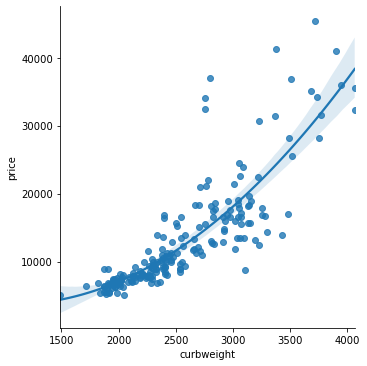

In [7]:
sns.lmplot(x = 'curbweight', y = 'price', data = data, order=2) 

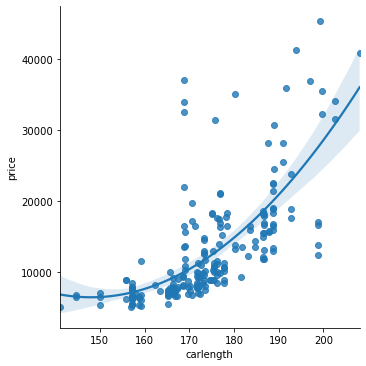

In [8]:
sns.lmplot(x = 'carlength', y = 'price', data = data, order=2)

As we saw the relationship is nonlinear, therefore we cannot fit a linear model, the relationship is more curved.

Let's first split our data into X features and y target.

In [9]:
X = data.drop('price', axis=1)
y = data.price

Now, let's split our data, into the training and testing sets, we'll save 30% of the data into the test set, and the remaining data for training.


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("Shape of test:", X_test.shape)
print("Shape of training:", X_train.shape)

Shape of test: (62, 35)
Shape of training: (143, 35)


Let's create a LinearRegression model.

In [11]:
lm = LinearRegression()

Now, let's fit the model with our features X_train and y_train data.


In [12]:
lm.fit(X_train, y_train);

We apply predict() function on the testing data set.


In [13]:
predicted = lm.predict(X_test)

Let's calculate the R2(coefficient of determination) on both, training and testing data sets.

In [14]:
print("R2 on training  data ",lm.score(X_train, y_train))
print("R2 on testing data ",lm.score(X_test,y_test))

R2 on training  data  0.9262005120114907
R2 on testing data  0.8500549812550089


Although we have a high R2 coefficient for both the training data and the test data, we can see that there is a small difference between the two and that means we may have a slightly overfitting model.

We can plot distributions of the predicted values versus the actual values.


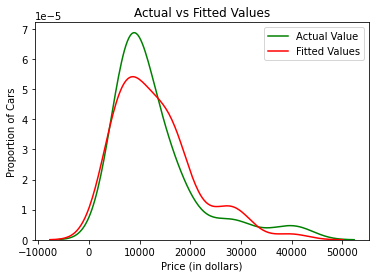

In [15]:
plot_dis(y_test,predicted)

We can see in the plot above that our data prediction slightly deviates from the actual data.

Below, we will view the estimated coefficients for the linear regression problem.


In [16]:
{col:coef for col,coef in zip(X.columns, lm.coef_)}

{'diesel': -1348733091931160.2,
 'gas': -1348733091932830.8,
 'std': 328.09636017791996,
 'turbo': -379.0415743673835,
 'convertible': 1754.235437293915,
 'hardtop': 3038.425405937796,
 'hatchback': -1726.915116536612,
 'sedan': -655.3274707371338,
 'wagon': -2409.074307082546,
 '4wd': -632.1716184519332,
 'fwd': -321.51861763260297,
 'rwd': 954.3270108498389,
 'dohc': 2460.105523267882,
 'dohcv': -13356.354667660296,
 'l': 2135.3973376499416,
 'ohc': 4619.6241388433,
 'ohcf': 6075.189965805647,
 'ohcv': -2664.358428925572,
 'rotor': 729.6254714929158,
 'eight': 9205.568023694754,
 'five': -2679.9390212080825,
 'four': -5283.668295516305,
 'six': -2115.911567126084,
 'three': 0.0029296875,
 'twelve': 144.64806138435134,
 'two': 729.6342605554158,
 'wheelbase': 99.61247779746205,
 'curbweight': 4.789142482173508,
 'enginesize': 23.503149010125764,
 'boreratio': -1809.3275275247115,
 'horsepower': 68.62591613088244,
 'carlength': -63.72227335557646,
 'carwidth': 577.0394096646708,
 'city

As we see, the first two coefficients are too large to plot, so we'll drop them and plot the rest of the coefficients.


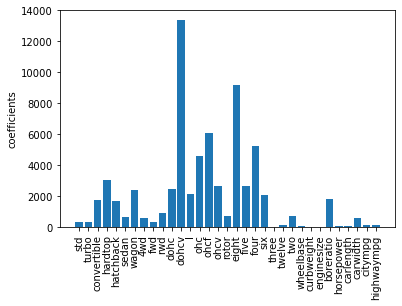

In [17]:
plt.bar(X.columns[2:],abs(lm.coef_[2:]))
plt.xticks(rotation=90)
plt.ylabel("coefficients")
plt.show()

Usually, we can interpret the lager coefficients as having more importance on the prediction, but this is not always the case, so let's look at the individual features.


We can train the model and plot our R2 for each of the features on the training and testing data sets, using the function get_R2_features.

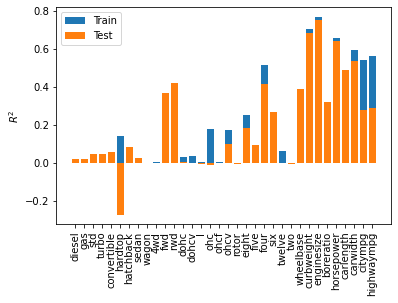

Training R2 mean value 0.21817773426877915 Testing R2 mean value 0.18241493035139267 
Training R2 max value 0.7686929078033781 Testing R2 max value 0.7534902447506853 


In [18]:
get_R2_features(lm)

From the above plot, we see that some individual features perform similarly to  using all the features (we removed the feature three ), in  addition, we see that smaller coefficients seem to correspond to a larger R2, therefore  larger coefficients correspond to overfiting.


Now, we will try to do the same like above but now we will calculate the R2 coefficent using the object Pipeline for Linear Regression and we will apply the function StandardSacler() to all features, then we will plot the real data with the predicted data.

R^2 on training data  0.9262722224294516
R^2 on testing data  0.8419174509630336


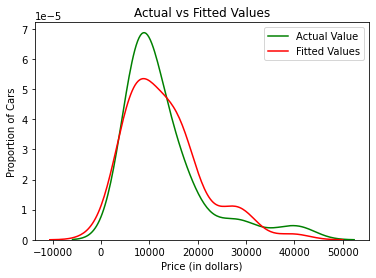

In [19]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())]) 
pipe.fit(X_train,y_train) 
print("R^2 on training data ", pipe.score(X_train, y_train)) 
print("R^2 on testing data ", pipe.score(X_test,y_test)) 
predicted = pipe.predict(X_test) 
plot_dis(y_test,predicted)

As we can see above, there is not much difference between the model fitted with the data that were standardized and the data that were not standardized. 

## Polynomial Features


Below we will perform a second degree (degree=2) polynomial transformation to increase the complexity of the model.

In [20]:
poly_features = PolynomialFeatures(degree=2, include_bias=True)

Now, we transform the training and testing data sets.


In [21]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

X_train_poly and X_test_poly now contain the original features of X plus the square of these features and the cross-terms combination.
Let's check the shape of the newly created train and test sets.


In [22]:
print("X_train_poly:", X_train_poly.shape, "   X_test_poly:", X_test_poly.shape)

X_train_poly: (143, 666)    X_test_poly: (62, 666)


Altogether, we have 665 features. Now, we fit the model with the newly created features.


In [23]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)
predicted = lm.predict(X_train_poly) #make predictions

Now, we can ckeck the R2 on both, training and testing data sets.

In [24]:
print("R2 on training data:", lm.score(X_train_poly, y_train))
print("R2 on testing data:", lm.score(X_test_poly,y_test))

R2 on training data: 0.998531849797587
R2 on testing data: -36729.95790886328


We see the model has a high negative R2 on the test data set, this is sign of overfiting.



Now, we will use the Pipeline module to create a pipeline that simplifies the steps, we will not standardize features.

In [25]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

We can see the results are identical.


In [26]:
print("R2 on training  data:", pipe.score(X_train, y_train))
print("R2 on testing data:", pipe.score(X_test,y_test))

R2 on training  data: 0.9985318497975881
R2 on testing data: -36729.95800645703


We can see that our model is highly overfitted, due to the score R2 in the trining set. 

Now, in order to avoid searching for the right parameters in this case only we will search fr the degree, we will use the GridSearchCV function along with the CrossValidation function. 
First, we create PolynomialFeatures() pipeline.

In [27]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)


We also create a dictionary of paramters values, the name followed by the parameters.

In [28]:
param_grid = {"polynomial__degree": [1, 2, 3, 4]}# "model__normalize":[True, False]

We create the model object and after we fit with the values, X_train and y_train.

In [29]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Next, with the object search fit the values X_test and y_test to find the best parameter values on the validation data.

In [30]:
search.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3, 4]})

We assign the search.best_estimator_ object to "best" to obtain the best parameters.

In [31]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LinearRegression())])

We see the degree is one and normalize is True

Now, we test our model on the test data to see if the best score is correct.


In [32]:
best.score(X_test,y_test)

0.9678749047353388

We can see that our R2 score is very high.

Finally, we can plot a distribution of the predicted values versus the actual values.


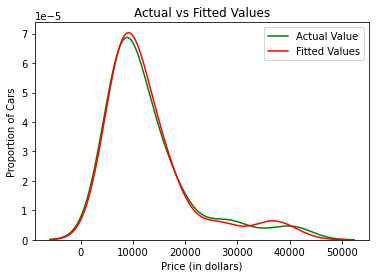

In [33]:
predicted=best.predict(X_test)
plot_dis(y_test,predicted)

As we can see we've find the best parameter, and our model is almost perfect.
